<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Dataset-Loading-&amp;-Exploration" data-toc-modified-id="Dataset-Loading-&amp;-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset Loading &amp; Exploration</a></span><ul class="toc-item"><li><span><a href="#Detected-problems" data-toc-modified-id="Detected-problems-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Detected problems</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Change-of-Formats" data-toc-modified-id="Change-of-Formats-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Change of Formats</a></span></li><li><span><a href="#Index-Setting" data-toc-modified-id="Index-Setting-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Index Setting</a></span></li><li><span><a href="#Chronological-Order" data-toc-modified-id="Chronological-Order-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Chronological Order</a></span></li><li><span><a href="#Resampling" data-toc-modified-id="Resampling-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Resampling</a></span></li></ul></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Training</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Samples-Formation" data-toc-modified-id="Samples-Formation-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Samples Formation</a></span></li><li><span><a href="#Benchmark-Setting" data-toc-modified-id="Benchmark-Setting-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Benchmark Setting</a></span></li><li><span><a href="#Window-Size-Value" data-toc-modified-id="Window-Size-Value-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Window Size Value</a></span></li><li><span><a href="#Features-Generation" data-toc-modified-id="Features-Generation-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Features Generation</a></span></li><li><span><a href="#Samples-Formation" data-toc-modified-id="Samples-Formation-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Samples Formation</a></span></li></ul></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Models-Analysis" data-toc-modified-id="Models-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Models Analysis</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

#  Taxi Orders Forecast

## Project Description

"*Chetenkoe Taxi*" company has collected historical data on taxi orders at airports. To attract more drivers during the peak period, it is required to predict the number of taxi orders for the next hour. The task is to build a model for such a prediction.

**The value of the *RMSE* metric on the test set should not exceed 48.**

Requirements:

1. Load the data and resample it for one hour
2. Analyze the data
3. Train different models with different hyperparameters. Make a test sample of 10% of the original data.
4. Check the data on the test sample and draw conclusions.


The data is in the `taxi.csv` file. The number of orders is in the `num_orders` column.

## Imports

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

## Dataset Loading & Exploration

In [7]:
df = pd.read_csv('/datasets/taxi.csv')

display(df.head(10))
display(df.info())
display(df.describe())

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
5,2018-03-01 00:50:00,21
6,2018-03-01 01:00:00,7
7,2018-03-01 01:10:00,5
8,2018-03-01 01:20:00,17
9,2018-03-01 01:30:00,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


None

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [8]:
df.head(10)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
5,2018-03-01 00:50:00,21
6,2018-03-01 01:00:00,7
7,2018-03-01 01:10:00,5
8,2018-03-01 01:20:00,17
9,2018-03-01 01:30:00,12


### Detected problems

- It is required to convert `datetime` field from **object** to **datetime64** format


- It is required to set the table index equal to the `datetime` field in order to work correctly with a time series


- Check if dates and time are in chronological order


- It looks like taxi orders are available for every 10 minutes in the original dataframe (we'll check this later). Resampling is going to be performed in such way so that the number of orders is displayed for each hour for each date

### Data Preprocessing

#### Change of Formats

In [9]:
df['datetime'] = df['datetime'].astype('datetime64') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


#### Index Setting

In [10]:
df.set_index('datetime', inplace=True)

df.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


#### Chronological Order

In [11]:
if df.index.is_monotonic == False:
    df.sort_index(inplace=True)
    print('Indexes are sorted out')
    
else:
    print('Sorting is not required')    

Sorting is not required


#### Resampling

In [12]:
print(df.index.to_series().diff().value_counts())

0 days 00:10:00    26495
Name: datetime, dtype: int64


Therefore, we see that the data is actually available for 10 minutes on each of the dates. Let's resample:

In [13]:
df = df.resample('1H').sum()

print(df.index.to_series().diff().value_counts())

0 days 01:00:00    4415
Name: datetime, dtype: int64


Resampling and initial data preparation of the time series were successfully performed

## Exploratory Data Analysis

We will break the resampled dataset into trend, seasonality and random part in order to understand what it consists of

In [14]:
def ts_analysis(data, elements):
    
    decomposed = seasonal_decompose(data)
    
    if elements == 0:
        plt.rcParams['figure.figsize'] = [17,18]
        plt.subplot(311)
        decomposed.trend.plot(ax=plt.gca())
        plt.title('Trend')

        plt.subplot(312)
        decomposed.seasonal.plot(ax=plt.gca()) 
        plt.title('Seasonality')

        plt.subplot(313)
        decomposed.resid.plot (ax=plt.gca())
        plt.title('Residuals')

        plt.tight_layout()
    
    elif elements == 1:
        plt.rcParams['figure.figsize'] = [17,5]
        decomposed.trend.plot()
        plt.title('Trend')
        
    elif elements == 2:
        plt.rcParams['figure.figsize'] = [17,5]
        decomposed.seasonal.plot() 
        plt.title('Seasonality')
        
    elif elements == 3:
        plt.rcParams['figure.figsize'] = [17,5]
        decomposed.resid.plot ()
        plt.title('Residuals')
    
    else:
        print('Invalid input. Enter an integer [0;3]')

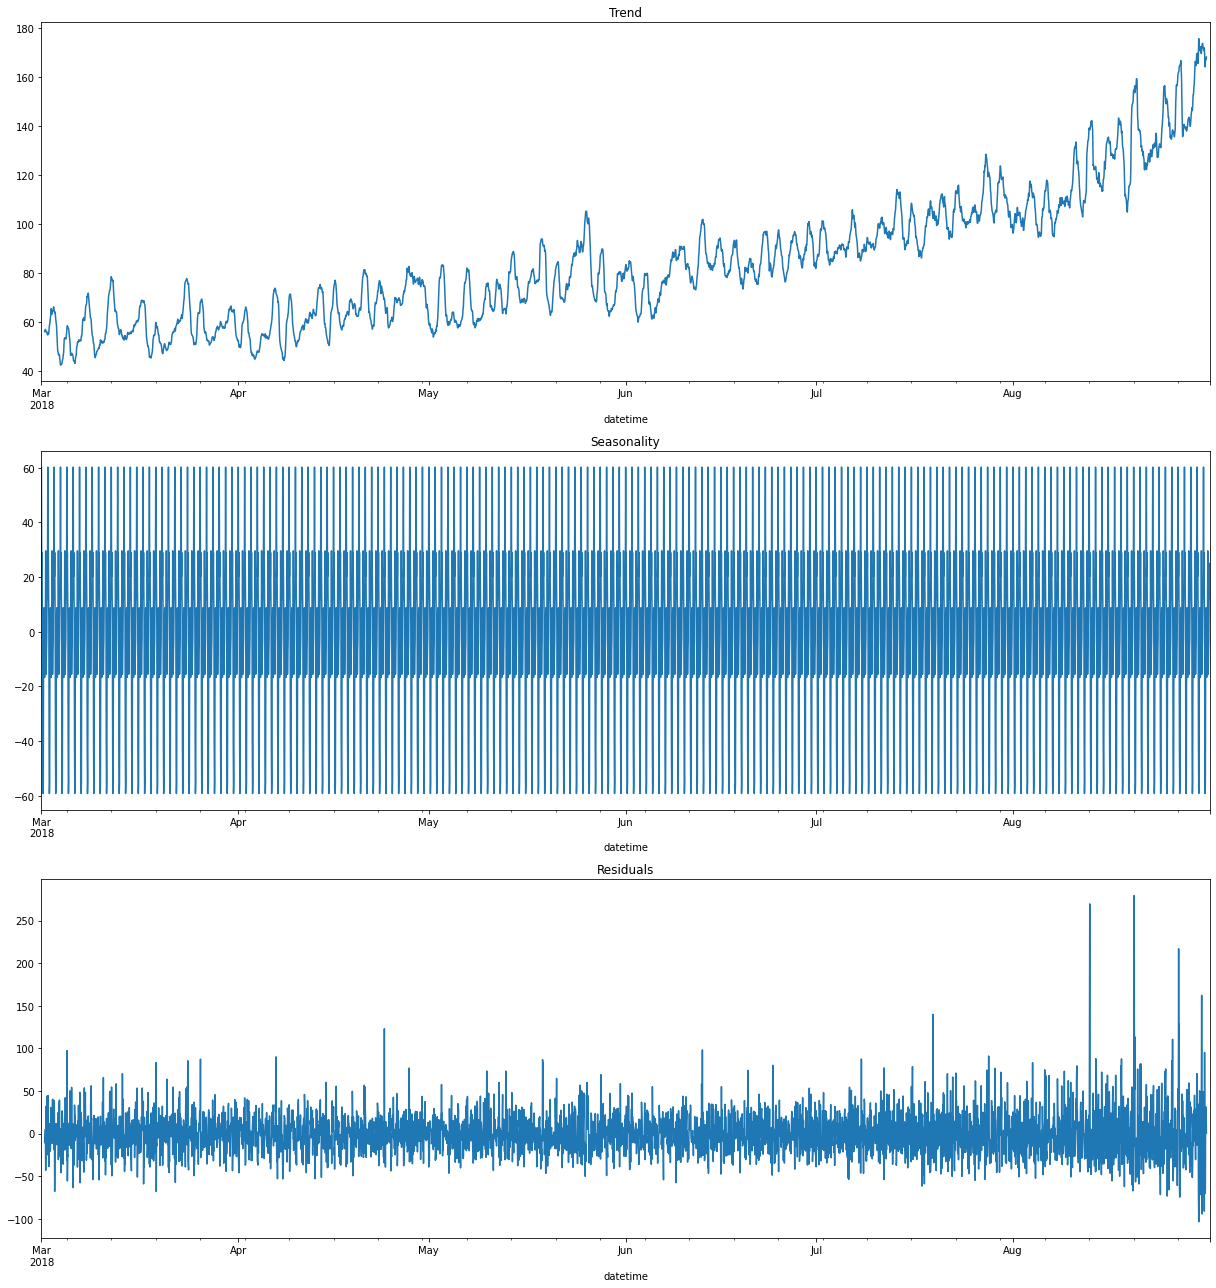

In [15]:
ts_analysis(df, 0)

* Looking at the trend, in general, everything is quite transparent - we can see that the number of orders per hour increases over time


* With seasonality nothing is clear at all, based on the constructed graph. We should take a shorter period (for example, the first 10 days of 2018-03, in order to study it in more detail


* The random part looks quite stationary - its distribution hardly changes over time. At some time intervals, change in the standard deviation  can be spotted - this is most noticeable for the period 2018-08

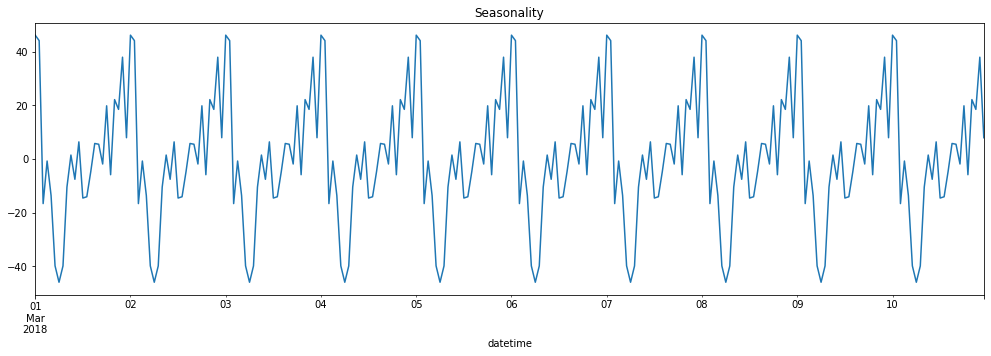

In [16]:
ts_analysis(df['2018-03-01':'2018-03-10'], 2)

After taking a shorter period for the seasonality, it is possible to see its presence within one day. It is clear that by the evening the demand for taxi orders is growing equally. As a result, the number of orders is increasing.

## Model Training 

We will take several models for training:

- LinearRegression

- LGBMRegressor

---
Let's try different hyperparameters for each of the models. As the **main metric** for the prediction of the next hour number of taxi orders, we are going to use **RMSE**. 

The critical requirement for this project is the RMSE value, which should be no more than 48 on the test sample.

### Data Preparation

#### Samples Formation

*This stage was introduced in order to calculate the prediction **WITHOUT** direct model training. For the models themselves, samples & features will be created using functions.*

Let's divide the dataset into training and test samples in a ratio of 9:1

In [17]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)

# check the division
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max(), '\n')


# check the ratio
dfs = [train, test]
train.name = 'Обучающая выборка'
test.name = 'Тестовая выборка'

for d in dfs:
    print(d.name, ': {:2}'.format(round(d.shape[0] / df.shape[0], 2)))

2018-03-01 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00 

Обучающая выборка : 0.9
Тестовая выборка : 0.1


#### Benchmark Setting

To check the time series model for adequacy, we will create a forecast without training using the previous value of the series, i.e. $ X_{(t-1)} $.

In [18]:
pred_previous = np.ones(test.shape) * test.shift(fill_value=train.iloc[-1]['num_orders'])
rmse_bench = mean_squared_error(test['num_orders'], pred_previous) ** 0.5

print("RMSE:", rmse_bench)

RMSE: 58.856486242815066


Now we will be able to understand if our to be trained model is going be reasonable

#### Window Size Value

The time series analysis has showed the presence of intraday seasonality. Therefore, the maximum value of the window size for determining the moving average must be less than the number of days for the training sample. Let's calculate this value:

In [19]:
delta = train.index.max() - train.index.min()
print(delta.days)

165


#### Features Generation

We will need:

* time features (year, month, etc.)

* lags

* moving average

In [20]:
# Function for features generation:

def make_features(data, max_lag, rolling_mean_size):
#     data['year'] = data.index.year
#     data['month'] = data.index.month
#     data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return data

#### Samples Formation

In [21]:
# Function for samples formation

def features(data):
    
    train, test = train_test_split(df, shuffle=False, test_size=0.1)
    train = train.dropna()
    
    # Training set
    features_train = train.drop(['num_orders'], axis=1)
    target_train = train['num_orders']

    # Test set
    features_test = test.drop(['num_orders'], axis=1)
    target_test = test['num_orders']
    
    return (features_train, target_train, features_test, target_test)

### Linear Regression

As parameters for linear regression - take the maximum number of lags and the window size for the moving average to find the best value of RMSE

In [22]:
%%time

best_model_reg = None
best_lag_reg = 0
best_window_reg = 0
best_rmse_reg = rmse_bench

for lag in range(1, 101, 10):
    for win in range(1, delta.days + 1, 5):
        
        df_reg = make_features(df, lag, win)
        
        (features_train_reg, target_train_reg, features_test_reg, target_test_reg) = features(df_reg)
        
        model_reg = LinearRegression()
        model_reg.fit(features_train_reg, target_train_reg)

        predicted_test_reg = model_reg.predict(features_test_reg)

        rmse_reg = mean_squared_error(target_test_reg, predicted_test_reg) ** 0.5
        
        if rmse_reg < best_rmse_reg:
            best_model_reg = model_reg
            best_lag_reg = lag
            best_window_reg = win
            best_rmse_reg = rmse_reg

print('Linear Regression RMSE: {:}'.format(best_rmse_reg))
print('lags number:', best_lag_reg)
print('window size:', best_rmse_reg)

Linear Regression RMSE: 40.51123078192567
lags number: 91
window size: 40.51123078192567
CPU times: user 25.8 s, sys: 46.1 s, total: 1min 11s
Wall time: 1min 17s


### LGBMRegressor

In [24]:
%%time

best_model_lgbm = None
best_est_lgbm = 0
best_rate_lgbm = 0
best_rmse_lgbm = rmse_bench

for rate in np.arange(0.1, 0.51, 0.1):
    for est in range(1, 201, 20):

        df_lgbm = make_features(df, 20, 20)

        (features_train_lgmb, target_train_lgmb, features_test_lgmb, target_test_lgmb) = features(df_lgbm)

        model_lgbm = LGBMRegressor(n_estimators=est, learning_rate = rate, objective='rmse', random_state=12345)
        model_lgbm.fit(features_train_lgmb, target_train_lgmb)               

        predicted_test_lgbm = model_lgbm.predict(features_test_lgmb)

        rmse_lgbm = mean_squared_error(target_test_lgmb, predicted_test_lgbm) ** 0.5

        if rmse_lgbm < best_rmse_lgbm:
            best_model_lgbm = model_lgbm
            best_est_lgbm = est
            best_rate_lgbm = rate
            best_rmse_lgbm = rmse_lgbm
            
print('LGBM Regressor RMSE: {:}'.format(best_rmse_lgbm))
print('n_estimators:', best_est_lgbm)
print('learning_rate:', best_rate_lgbm)

LGBM Regressor RMSE: 38.014161957762134
n_estimators: 81
learning_rate: 0.2
CPU times: user 2min 29s, sys: 0 ns, total: 2min 29s
Wall time: 2min 35s


## Models Analysis

In [25]:
models = ['LinearRegression', 'LGBMRegressor']
rmse_results = [best_rmse_reg, best_rmse_lgbm]


pd.DataFrame({'Model': models, \
              'RMSE': rmse_results}).sort_values(by='RMSE')

,Model,RMSE
1,LGBMRegressor,38.014162
0,LinearRegression,40.511231


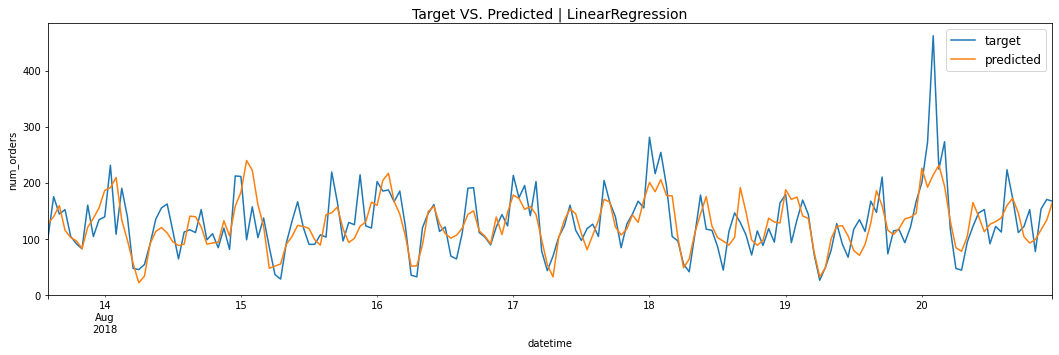

In [30]:
predicted_test_reg_df = pd.DataFrame(data=predicted_test_reg, index=target_test_reg.index)
target_predicted = pd.concat([target_test_reg, predicted_test_reg_df], axis=1)

target_predicted.columns = ['target', 'predicted']

plt.rcParams['figure.figsize'] = [18,5]

target_predicted['2018-08-13':'2018-08-20'].plot()
plt.title('Target VS. Predicted | LinearRegression', fontsize=14)
plt.ylabel('num_orders')
plt.legend(fontsize=12)

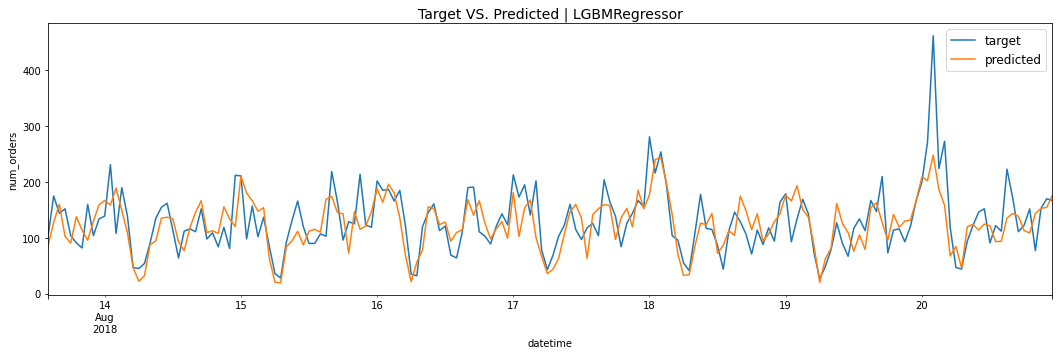

In [31]:
predicted_test_lgbm_df = pd.DataFrame(data=predicted_test_lgbm, index=target_test_reg.index)
target_predicted_lgbm = pd.concat([target_test_reg, predicted_test_lgbm_df], axis=1)

target_predicted_lgbm.columns = ['target', 'predicted']

plt.rcParams['figure.figsize'] = [18,5]

target_predicted_lgbm['2018-08-13':'2018-08-20'].plot()
plt.title('Target VS. Predicted | LGBMRegressor', fontsize=14)
plt.ylabel('num_orders')
plt.legend(fontsize=12)

## Conclusions

* The **Linear regression** model has showed the best result in terms of loss function value (RMSE) when the moving average window was set to ~41 and the number of lags was set to 81


* The **LGBM Regressor** model showed the best result in terms of lost function value (RMSE) with learning rate = 0.2 and number of estimators = 81


* One should not ignore using gradient boosting method. In order to save time for training and prediction, the parameters of the window size and the number of lags were fixed at the level (20, 20), respectively. At the next step, these parameters should also be included in the task of optimizing the RMSE metric. **Potentially LGBMRegressor could give a better result** (while sacrificing time resource)


* Both trained models on the test set showed the result of **RMSE less than 48**, which satisfies the requirement


* From the graphs, we can also see that the models quite adequately catch intraday seasonality.


* Sanity check was also passed be every trained model